# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-wIzUAwxh-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  12%|█▏        | 13000/112120 [00:00<00:02, 44914.63 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 109726.38 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 131384.45 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 141205.31 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 147036.26 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 150888.03 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 72974.81 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 105963.21 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 123477.05 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 141862.69 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 147308.72 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 157741.64 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.77 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.68 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.48 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.18 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.15 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.51 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.28 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.80 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.39 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.68 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.89 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.29 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.70 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.46 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.93 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.99 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.02 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.77 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.82 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.12 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.75 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.04 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.01 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 46.58 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.31 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.12 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.13 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.28 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.80 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 27.63 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 34.79 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.97 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:05, 26.97 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:03, 34.65 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 40.44 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 43.70 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 45.45 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 44.69 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.25 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.19 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.25 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.62 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.05 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.28 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.57 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.70 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.61 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.69 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.06 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 37.90 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.73 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.73 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.24 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.76 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 46.28 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 48.79 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.25 examples/s]

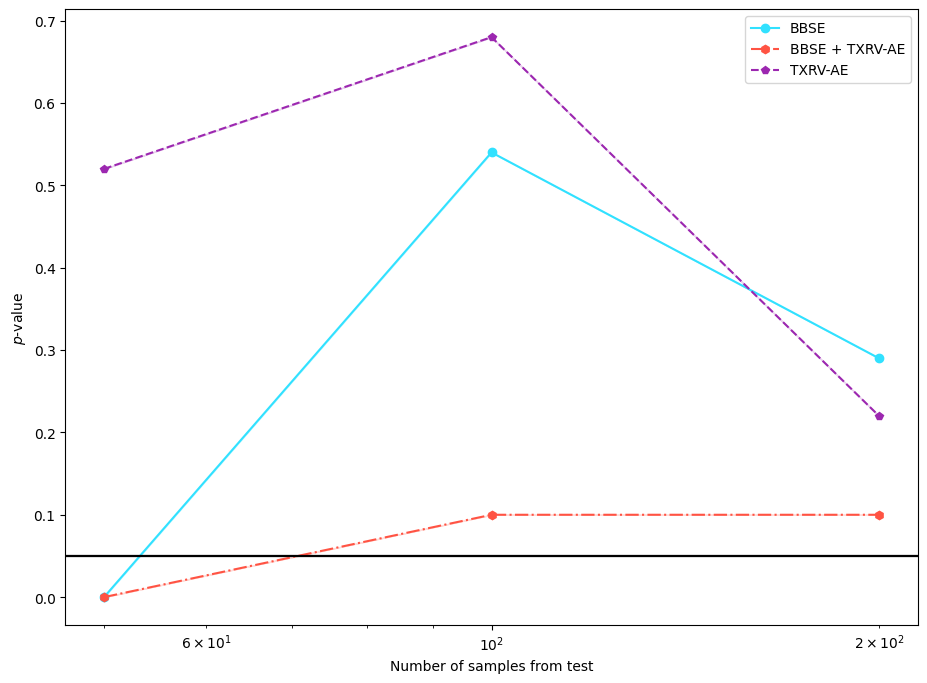

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.42 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.77 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.53 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.53 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.85 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.70 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.07 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.98 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.82 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.80 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.13 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 37.58 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.13 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.60 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.84 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.68 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.31 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.67 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.34 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.56 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.32 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.22 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.08 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.18 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.82 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.69 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.81 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.03 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.90 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.42 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.75 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.51 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.15 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.22 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.82 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 49.31 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.38 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.00 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.52 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.02 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.71 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.58 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.68 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.20 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.77 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.28 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.14 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.32 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.96 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.12 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.50 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.47 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.91 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.10 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 48.91 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.15 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.45 examples/s]

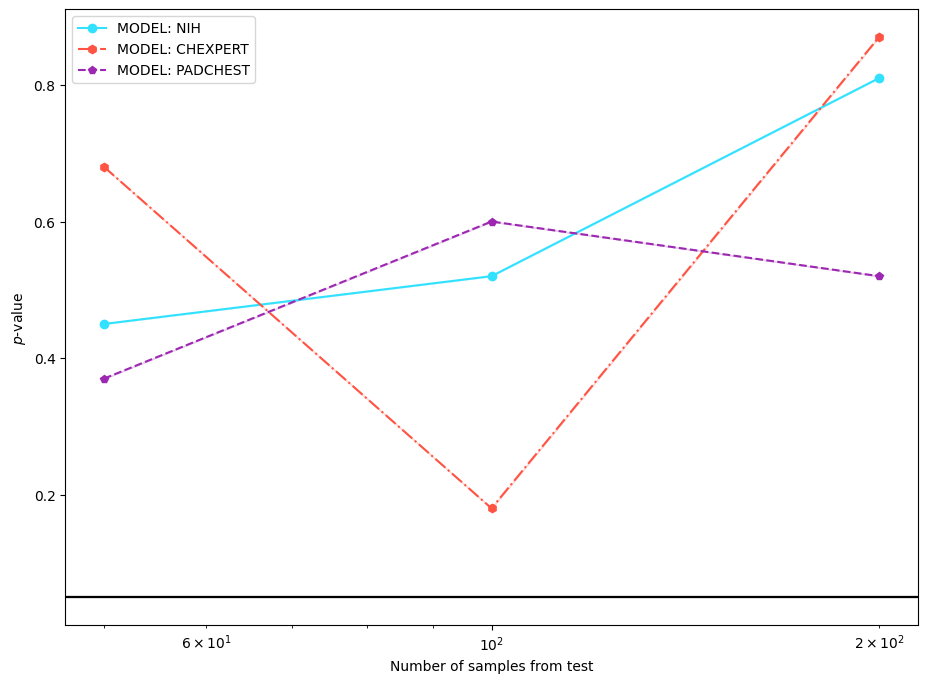

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 53755.09 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 73354.98 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84884.26 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 89971.13 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 93191.62 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 97681.25 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:02, 44273.72 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 67800.49 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 80742.09 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 89038.89 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 94792.64 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 97975.43 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.29 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.42 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.85 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.06 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.66 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.52 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.09 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.01 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.00 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.81 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.41 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.02 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.51 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.10 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.23 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.56 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.60 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.24 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.15 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50231.75 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71987.84 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 83348.60 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 90333.42 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 93763.26 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 96976.14 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:02, 46634.71 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 68355.51 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 78678.65 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 87580.53 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 93840.02 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 97711.66 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.46 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.50 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.20 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.39 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.90 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.30 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.94 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.93 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.66 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.63 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.36 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.79 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.01 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.62 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.35 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.20 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.02 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.85 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.39 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 49980.84 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 68495.99 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 82822.66 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 91752.06 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 102193.49 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 109031.11 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 49476.51 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71399.36 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 83392.70 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 90727.96 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 95083.74 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 97693.41 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.26 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.81 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.37 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.34 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.86 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.73 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.26 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.74 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.44 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.41 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.93 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.02 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.95 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.02 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.72 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.00 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.91 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.95 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.46 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 52046.33 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 67862.26 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 81878.97 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 91411.12 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 102549.46 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 111518.78 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 47240.32 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 67505.33 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 78220.66 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 85788.94 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 95324.43 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 98637.10 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.66 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.04 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.63 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.51 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.18 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.48 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.92 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.74 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.65 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.81 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.69 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.65 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.88 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.73 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.93 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.86 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.97 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.82 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.44 examples/s]

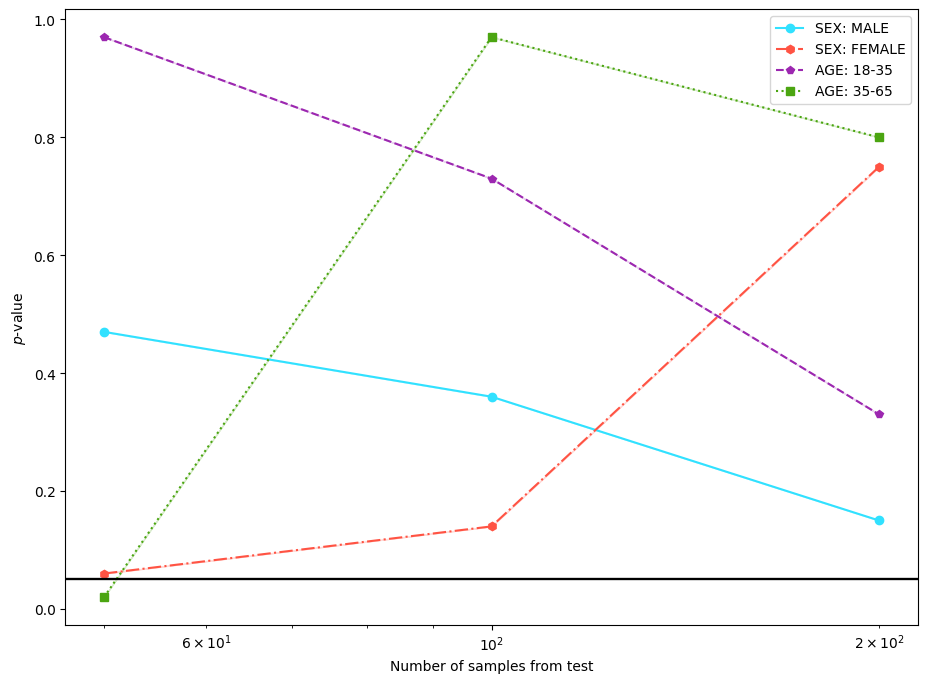

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.53 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.09 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.77 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.50 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.05 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.42 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.87 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.07 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.09 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.64 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.62 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.76 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.69 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.92 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.78 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.87 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.72 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.63 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.42 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.68 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.45 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.17 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.43 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.49 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.37 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.43 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.30 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.77 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.59 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.58 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.11 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.43 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.24 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.75 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.58 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.78 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.50 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.63 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.78 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.68 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.61 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.98 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.12 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.94 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.96 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.88 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.96 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.99 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.10 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.59 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.64 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.98 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.19 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.40 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.61 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.74 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.81 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.11 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.16 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.86 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.97 examples/s]

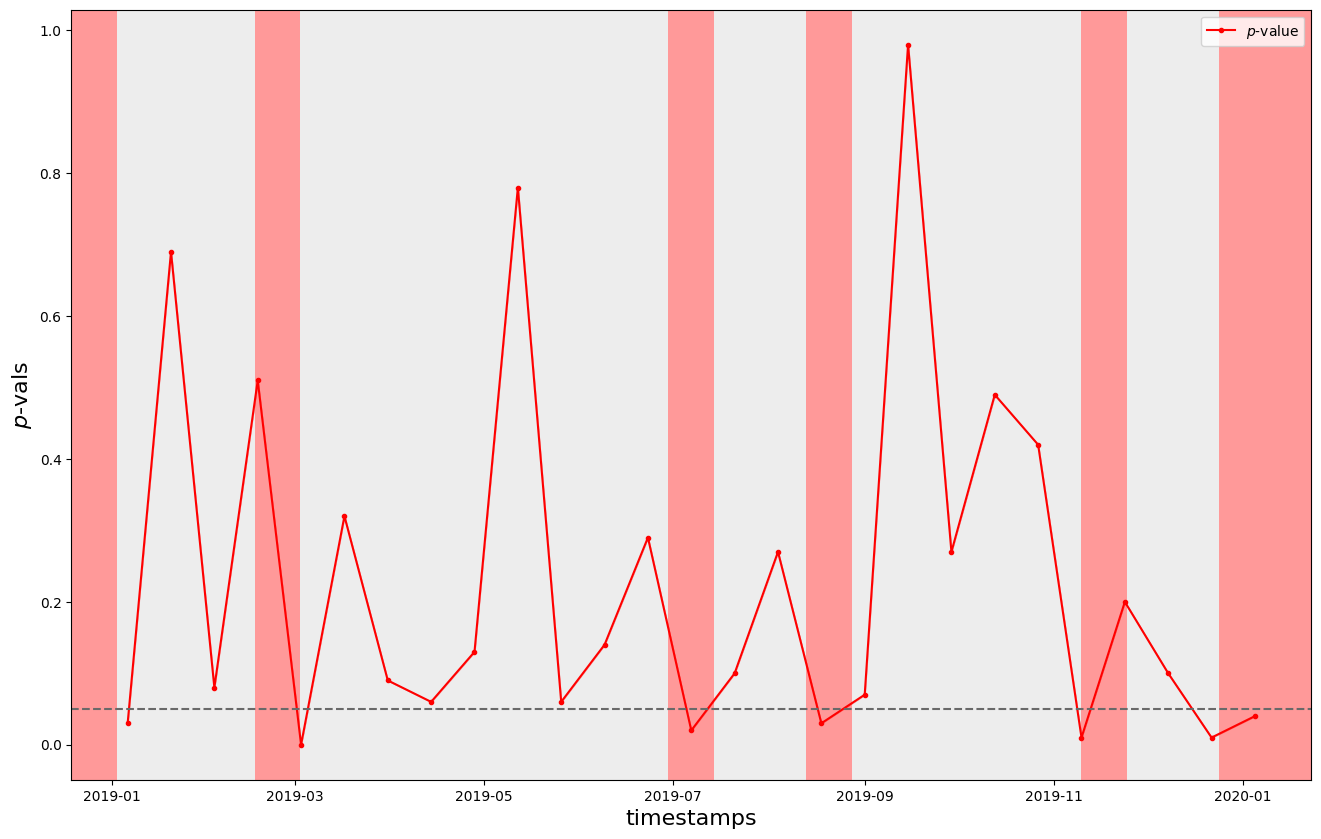

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)